In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tw= pd.read_csv(r"C:\Users\ashish\Downloads\tweets.csv (1)\tweets.csv")

In [3]:
tw

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [5]:
tw.isnull().sum()[tw.isnull().sum()>0]

location    3418
dtype: int64

In [6]:
tw = tw.drop('location' , axis=1)

In [7]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11370 non-null  int64 
 1   keyword  11370 non-null  object
 2   text     11370 non-null  object
 3   target   11370 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 355.4+ KB


In [8]:
tw.keyword.unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'bush%20fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash',
       'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
       'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged',
       'demolish', 'demolished', 'demolition', 'derail', 'derailed',
       'derailment', 'desol

In [9]:
tw['keyword'] = tw['keyword'].str.replace('%20', ' ')

In [10]:
import re   # it used to working to regural expression


In [11]:
tw.isnull().sum()[tw.isnull().sum()>0]

Series([], dtype: int64)

In [12]:
#tw['keyword'] = tw['keyword'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))


In [13]:
tw.keyword.unique()

array(['ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
       'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned', 'burning',
       'bush fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical emergency', 'cliff fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash',
       'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
       'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged',
       'demolish', 'demolished', 'demolition', 'derail', 'derailed',
       'derailment', 'desolate', 'desolation', 'destr

In [14]:
tw.text.unique()

array(['Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…',
       'Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…',
       'Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI',
       ...,
       'i feel directly attacked 💀 i consider moonbin &amp; jinjin as my bias and im currently wrecked by rocky i hate this https://t.co/psLBecS7hI',
       'ok who remember "outcast" nd the "dora" au?? THOSE AU WRECKED OUR NERVES ND BRAINCELLS JDKSHSSJHS LEGENDS',
       'Jake Corway wrecked while running 14th at IRP.'], dtype=object)

In [15]:
import html

In [16]:
def clean_text(text):
    # 1. Convert HTML entities (&amp; etc.) to their corresponding characters
    text = html.unescape(text)
    
    # 2. Remove URLs
    text = re.sub(r"http\S+|www\S+", '', text)
    
    # 3. Remove special characters and digits, keeping only alphabets and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 4. Convert to lowercase for uniformity
    text = text.lower()
    
    # 5. Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Apply the cleaning function to the 'text' column
tw['text'] = tw['text'].apply(clean_text)



In [17]:
tw.text.unique()

array(['communal violence in bhainsa telangana stones were pelted on muslims houses and some houses and vehicles were set ablaze',
       'telangana section has been imposed in bhainsa from january to after clash erupted between two groups on january po',
       'arsonist sets cars ablaze at dealership', ...,
       'i feel directly attacked i consider moonbin jinjin as my bias and im currently wrecked by rocky i hate this',
       'ok who remember outcast nd the dora au those au wrecked our nerves nd braincells jdkshssjhs legends',
       'jake corway wrecked while running th at irp'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
tw.select_dtypes(include='object').columns

Index(['keyword', 'text'], dtype='object')

In [20]:
tw[tw.select_dtypes(include='object').columns] = tw[tw.select_dtypes(include='object').columns].apply(le.fit_transform)

In [21]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       11370 non-null  int64
 1   keyword  11370 non-null  int32
 2   text     11370 non-null  int32
 3   target   11370 non-null  int64
dtypes: int32(2), int64(2)
memory usage: 266.6 KB


In [22]:
tw

,id,keyword,text,target
0,0,0,1669,1
1,1,0,8086,1
2,2,0,775,1
3,3,0,775,1
4,4,0,5454,0
...,...,...,...,...
11365,11365,218,5669,0
11366,11366,218,3593,0
11367,11367,218,3593,0
11368,11368,218,6422,0


In [23]:

sns.set(style="whitegrid")                #Set the visual aesthetic style for the plots

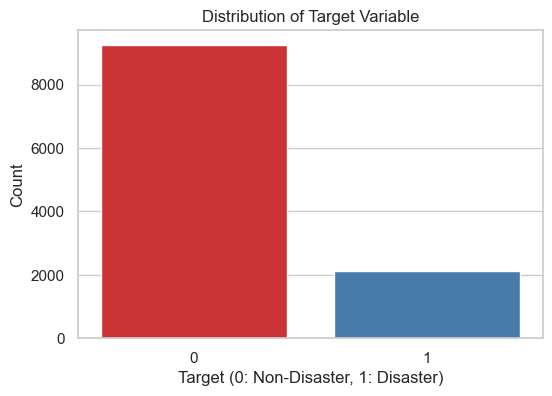

In [24]:
plt.figure(figsize=(6, 4))                            # Distribution of the Target Variable (0 - Non-disaster, 1 - Disaster)
sns.countplot(x='target', data=tw, palette='Set1')
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0: Non-Disaster, 1: Disaster)')
plt.ylabel('Count')
plt.show()

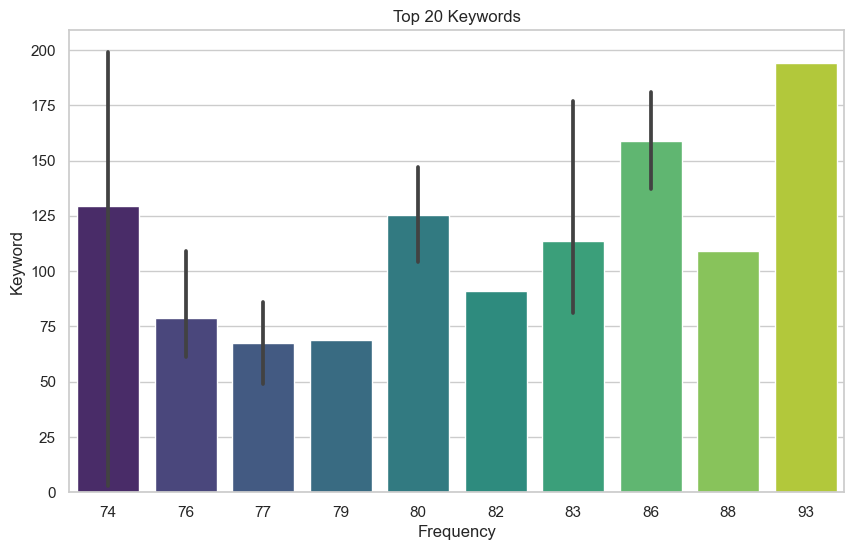

In [25]:
plt.figure(figsize=(10, 6))                                 #  Distribution of Keywords (Top 20)
top_20_keywords = tw['keyword'].value_counts().head(20)
sns.barplot(x=top_20_keywords.values, y=top_20_keywords.index, palette='viridis')
plt.title('Top 20 Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()


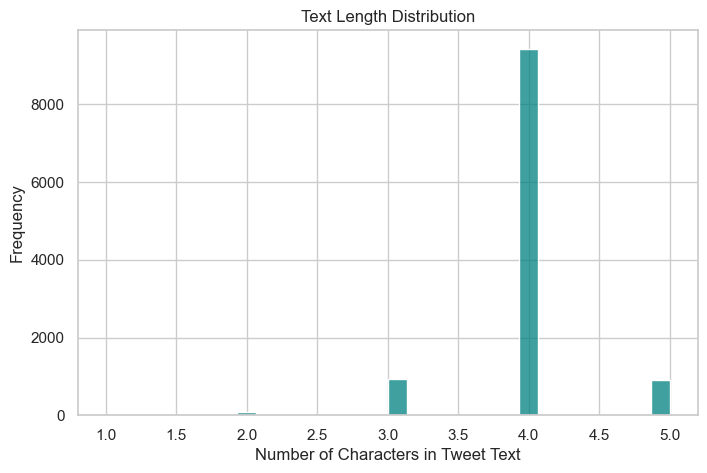

In [30]:
# Plotting the text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(tw['text_length'], bins=30, color='teal')
plt.title('Text Length Distribution')
plt.xlabel('Number of Characters in Tweet Text')
plt.ylabel('Frequency')
plt.show()

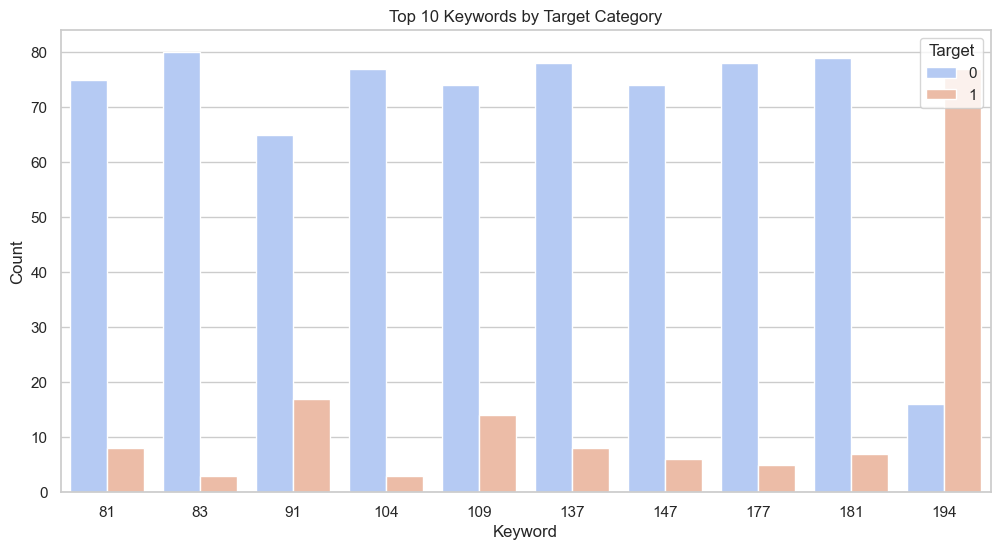

In [27]:
plt.figure(figsize=(12, 6))                                  # Relationship between Keyword and Target (Top 10 Keywords)
top_keywords = tw['keyword'].value_counts().head(10).index
subset = tw[tw['keyword'].isin(top_keywords)]
sns.countplot(data=subset, x='keyword', hue='target', palette='coolwarm')
plt.title('Top 10 Keywords by Target Category')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right')
plt.show()

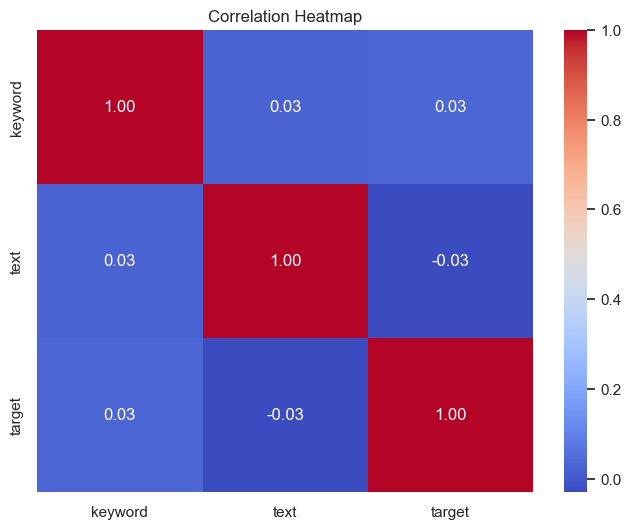

In [28]:
plt.figure(figsize=(8, 6))                                    # Correlation Heatmap of Numeric Features
corr_matrix = tw[['keyword', 'text', 'target']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()